# Test for model testing

## Experiment 5
Location test with CNN

In [1]:
import pathlib
import itertools
import collections
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load in Dataset

In [2]:
X = []
Y = []
title = []
coorDataLocation = "D:/Thesis/ELAR-Data/imputedArrayData/"
dirData = os.listdir(coorDataLocation)
for i, data in enumerate(dirData):
    if i % 2:
        continue
    coorLoad = np.loadtxt(coorDataLocation + data)
    coorShape= np.loadtxt(coorDataLocation + dirData[i + 1])
    try:
        coorLoad = coorLoad.reshape(coorLoad.shape[0], coorLoad.shape[1] // int(coorShape[2]), int(coorShape[2]))
    except:
        print(data, dirData[i + 1], coorLoad.shape, coorShape.shape)
    title.append(data)
    X.append(coorLoad)
len(X)

14058

#### Remove the .npy and replace .mp4

In [3]:
newTitle = []

for name in title:
    newName = name[:-4] + '.mp4'
    newTitle.append(newName)
title = np.array(newTitle)
len(title)

14058

#### Save OriginalX values

In [4]:
originalX = X
originalTitle = title
len(originalX)

14058

#### In case error ocured reload in x

In [5]:
X = originalX
title = originalTitle
len(X)

14058

# Load in the classifications

In [6]:
saveLocation = "D:/Thesis/Video-Auslan-sorted"
Locations = {}
for word in os.listdir(saveLocation):
    Locations[word] = None
    
f = open("keyBindsLocation.txt", "r")
line = f.readline()
while (line):
    try:
        if line.split("_|_")[1] == 'None\n':
            Locations[line.split("_|_")[0]] = None
        else:
            Locations[line.split("_|_")[0]] = line.split("_|_")[1]
    except:
        i = 1
    line = f.readline()
f.close()
Locations

{'ABOUT1': 'Hand\n',
 'ABOUT2': None,
 'ABOUT2(7)': 'Neutral\n',
 'ABOUT2(B)': None,
 'ABOUT2(FALSE-START)': None,
 'ACCEPT': 'Chest\n',
 'ACCOMMODATION-2H': 'Neutral\n',
 'ACCURATE': 'Hand\n',
 'ACHIEVE': None,
 'ACTIVITY-THERE': 'Neutral\n',
 'ADULT': None,
 'AFRAID': None,
 'AFTERNOON': None,
 'AFTERNOON3': None,
 'AFTERNOON4': 'Chin\n',
 'AGAIN': None,
 'AGAIN(8)': None,
 'AGAIN-2H': None,
 'AGAIN-AND-AGAIN': 'Neutral\n',
 'AGES': 'Wrist\n',
 'AGREE': 'Hand\n',
 'AIM': 'Hand\n',
 'ALIVE': None,
 'ALL': None,
 'ALL-2H': None,
 'ALL-DAY': 'Neutral\n',
 'ALL-DAY-2H': 'Neutral\n',
 'ALL-DAY-LONG': 'Neutral\n',
 'ALLOW': None,
 'ALMOST': None,
 'ALMOST(FLATGO)': None,
 'ALMOST-2H': None,
 'ALRIGHT': 'Ear\n',
 'ALRIGHT-2H': None,
 'ALRIGHT2': 'Neutral\n',
 'ALWAYS': 'Ear\n',
 'ALWAYS1': None,
 'ALWAYS2': None,
 'AMERINDIAN': 'Head\n',
 'AMERINDIAN(FALSE START)': None,
 'AMERINDIAN2': 'Mouth\n',
 'AMERINDIAN2(FALSE START)': None,
 'AND-THEN': None,
 'AND1': 'Neutral\n',
 'ANGRY': None,
 '

# See what percentage of words have a Classification

In [7]:
print(len(Locations.items()))
print(len([i for i in Locations.values() if not i == None]))


1972
697


## Load in usability

In [8]:
usability = {}

f = open("useability.txt", "r")
line = f.readline()
while (line):
    try:
        if line.split("_|_")[1] == 'None\n':
            usability[line.split("_|_")[0]] = None
        else:
            usability[line.split("_|_")[0]] = int(line.split("_|_")[1])
    except:
        if line != '\n':
            print(line)
    line = f.readline()
f.close()
usability

{'ABOUT1_BFSA1c2a_1630_1990.mp4': 0,
 'ABOUT1_BRCA1c2a_27365_27645.mp4': 0,
 'ABOUT1_BRCA1c2a_29505_29985.mp4': 0,
 'ABOUT1_SBS1A3c7a_950_1280.mp4': 3,
 'ABOUT2_AAPB2c7a_310_800.mp4': 2,
 'ABOUT2_AJPB1c2b_2490_2650.mp4': 0,
 'ABOUT2_AJPB2c7a_1135_2270.mp4': 3,
 'ABOUT2_AMGA1c2a_1580_1820.mp4': 1,
 'ABOUT2_AMGA1c2a_730_1170.mp4': 3,
 'ABOUT2_AMW2A1c2b_890_1020.mp4': 1,
 'ABOUT2_BCHA2c7a_4470_5330.mp4': 0,
 'ABOUT2_BCHA2c7a_5750_6050.mp4': 0,
 'ABOUT2_BDLA1c2a_1800_2290.mp4': 0,
 'ABOUT2_BMKB2c7a_1010_1700.mp4': 4,
 'ABOUT2_BRCA1c2a_9460_9980.mp4': 0,
 'ABOUT2_MBHA1c2a_4750_5175.mp4': 4,
 'ABOUT2_MFKA1c2a_6180_6460.mp4': 2,
 'ABOUT2_MGCA1c2b_4880_5510.mp4': 4,
 'ABOUT2_MGCA1c2b_52725_53635.mp4': 4,
 'ABOUT2_MGCA1c2b_5840_6150.mp4': 2,
 'ABOUT2_MTDBA2c7a_1290_2190.mp4': 4,
 'ABOUT2_PGMB1c2a_1230_2110.mp4': 4,
 'ABOUT2_PJEB1c2a_2500_3100.mp4': 4,
 'ABOUT2_PNAA1c2b_1880_2660.mp4': 4,
 'ABOUT2_SBS1A1c2b_7320_7630.mp4': 2,
 'ABOUT2_SPKA1c2a_171110_171409.mp4': 1,
 'ABOUT2_STMB1c2a_13650_13800

## Primary Movement KeyBind.txt -> int

In [9]:
label_keys = {"Head\n":0, "Eye\n":1, "Forehead\n":2, "Nose\n":3, 
              "Ear\n":4, "Mouth\n":5, "Chin\n":6, 
              "Neck\n":7, "Shoulders\n":8, 
              "ArmPit\n":9, "Chest\n":10, "Waist\n": 11,
              "Back\n":12, "Thigh\n":13, "Stomach\n": 14,
              "Arm\n":15, "Wrist\n":16, "Hand\n": 17,
              "Neutral\n": 18}
label_keys

{'Head\n': 0,
 'Eye\n': 1,
 'Forehead\n': 2,
 'Nose\n': 3,
 'Ear\n': 4,
 'Mouth\n': 5,
 'Chin\n': 6,
 'Neck\n': 7,
 'Shoulders\n': 8,
 'ArmPit\n': 9,
 'Chest\n': 10,
 'Waist\n': 11,
 'Back\n': 9,
 'Thigh\n': 10,
 'Stomach\n': 11,
 'Arm\n': 9,
 'Wrist\n': 10,
 'Hand\n': 11,
 'Neutral\n': 11}

# Assign each data point to a classification
## Each of these will be classified to X and Y

In [10]:
coorDataLocation = "D:/Thesis/ELAR-Data/imputedArrayData/"
dirData = os.listdir(coorDataLocation)
videoWord = []
for i, data in enumerate(dirData):
    if i % 2:
        continue
    try:
        videoWord.append(label_keys[Locations[data.split("_")[0]]])
    except:
        videoWord.append(99) 
videoWord

[11,
 11,
 11,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 10,
 11,
 11,
 11,
 11,
 99,
 99,
 99,
 11,
 99,
 99,
 99,
 99,
 6,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 11,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 99,
 99,
 99,
 99,
 11,
 11,
 11,
 11,
 11,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 99,
 11,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 

## Append X values with a Y data label

In [11]:
newX = []
newTitle = []
Y = []
print(len(X), len(videoWord))
for i, y in enumerate(videoWord):
    # 99 was assigned if an error occured when importing and 11 is for unknown datalabels
    if y != 99 and y != 11:
        newX.append(X[i])
        newTitle.append(title[i])
        Y.append(y)
X = newX
title = np.array(newTitle)
print(len(X), len(title))

14058 14058
1580 1580


## Remove X and Y that are low usability

In [12]:
print(len(X),len(Y))
newX = []
newY = []
for i in range(len(X)):
    if usability[title[i]] >= 2:
        newX.append(X[i])
        newY.append(Y[i])
X = np.array(newX)
Y = np.array(newY)
print(len(X),len(Y))

1580 1580
1360 1360


## check shape of data

In [13]:
newX = []
newY = []
for i in range(len(X)):
    try:
        if X[i].shape[1] == 33 or X[i].shape[2] == 3:
            newX.append(X[i])
            newY.append(Y[i])
    except:
        continue
X = np.array(newX)
Y = np.array(newY)

In [14]:
print(len(X), len(Y), len(originalX))
print(X.shape)

1360 1360 14058
(1360, 40, 33, 3)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# Model Testing

In [16]:
import torch
import torch.nn as nn
import torchvision
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import resnet18  # ResNet-18 architecture

### set the device to CPU

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## Conver X and Y into a PyTorch Tensor

In [18]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

In [19]:
class CustomDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

In [20]:
batch_size = 32

In [21]:
train_dataset = CustomDataset(X_train_tensor, y_train_tensor)
test_dataset = CustomDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset,batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=batch_size, shuffle=True)

len(label_keys)

## Neural Network using Pytorch

In [22]:
class BasicNeuralModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(BasicNeuralModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Reshape to (batch_size, 40 * 33 * 3)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [23]:
# Define the dimensions based on your data
input_dim = 40 * 33 * 3  # 40 frames, 33 points, 3 dimensions
hidden_dim = 256
output_dim = len(label_keys)

In [24]:
# Instantiate the model
model = BasicNeuralModel(input_dim, hidden_dim, output_dim)
model = model.to(device)

In [25]:
num_epochs =  600
learning_rate = 0.001

In [26]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [27]:
# Set the model in training mode
model.train()

for epoch in range(num_epochs):    
    for batch_inputs, batch_targets in train_loader:  # You need to create a DataLoader for your data
        batch_inputs = batch_inputs.float().to(device)
        batch_targets  = batch_targets.to(device)
        batch_targets = batch_targets.view(-1, 1) 
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(batch_inputs)
        
        # Compute the loss
        loss = criterion(outputs, batch_targets)
        
        # Backpropagation
        loss.backward()
        
        # Update the weights
        optimizer.step()
    
    # Print the loss for this epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

c:\Users\KAI\.conda\envs\ml\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 19])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\KAI\.conda\envs\ml\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([15, 1])) that is different to the input size (torch.Size([15, 19])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [1/600], Loss: 6.9030
Epoch [2/600], Loss: 5.8699
Epoch [3/600], Loss: 8.0415
Epoch [4/600], Loss: 7.6102
Epoch [5/600], Loss: 7.1304
Epoch [6/600], Loss: 8.9161
Epoch [7/600], Loss: 4.7764
Epoch [8/600], Loss: 5.4154
Epoch [9/600], Loss: 5.9761
Epoch [10/600], Loss: 9.0827
Epoch [11/600], Loss: 3.4858
Epoch [12/600], Loss: 4.7047
Epoch [13/600], Loss: 4.0376
Epoch [14/600], Loss: 7.9440
Epoch [15/600], Loss: 3.1984
Epoch [16/600], Loss: 2.8872
Epoch [17/600], Loss: 4.3397
Epoch [18/600], Loss: 3.3077
Epoch [19/600], Loss: 2.9852
Epoch [20/600], Loss: 7.3201
Epoch [21/600], Loss: 4.7391
Epoch [22/600], Loss: 4.4823
Epoch [23/600], Loss: 4.7134
Epoch [24/600], Loss: 4.1330
Epoch [25/600], Loss: 3.5830
Epoch [26/600], Loss: 5.6009
Epoch [27/600], Loss: 3.8353
Epoch [28/600], Loss: 6.4601
Epoch [29/600], Loss: 1.4944
Epoch [30/600], Loss: 2.7921
Epoch [31/600], Loss: 3.2965
Epoch [32/600], Loss: 4.9363
Epoch [33/600], Loss: 3.4481
Epoch [34/600], Loss: 8.4998
Epoch [35/600], Loss: 4

### Save model

In [28]:
torch.save(model.state_dict(), 'BasicNeuralModelExperiment5.pth')

## Basic NerualNet Accuracy

In [29]:
def calculate_accuracy(predictions, labels):
    # Calculate overall accuracy
    total_samples = labels.size(0)
    correct_predictions = (predictions == labels).sum().item()
    accuracy = correct_predictions / total_samples

    # Calculate accuracy for each label
    label_accuracy = {}
    unique_labels = torch.unique(labels)
    for label in unique_labels:
        label_indices = (labels == label).nonzero().squeeze()
        label_predictions = predictions[label_indices]
        correct_label_predictions = (label_predictions == label).sum().item()
        total_label_samples = len(label_indices)
        label_accuracy[label.item()] = correct_label_predictions / total_label_samples

    return accuracy, label_accuracy

In [30]:
# Set the model to evaluation mode
model.eval()

# Forward pass to get predictions
with torch.no_grad():
    test_predictions = model(X_test_tensor)

# Convert predictions to class labels (assuming your output is regression-like)
test_predictions_labels = torch.argmax(test_predictions, dim=1)

# Calculate accuracy
overall_accuracy, label_accuracy = calculate_accuracy(test_predictions_labels, y_test_tensor)

print(f'Overall Accuracy: {overall_accuracy:.4f}')
print('Label Accuracy:')
for label, acc in label_accuracy.items():
    print(f'Label {label}: {acc:.4f}')

Overall Accuracy: 0.0802
Label Accuracy:
Label 0.0: 0.0294
Label 1.0: 0.0000
Label 2.0: 0.0000
Label 3.0: 0.0000
Label 4.0: 0.0190
Label 5.0: 0.0610
Label 6.0: 0.0440
Label 7.0: 0.2500
Label 8.0: 0.0000
Label 9.0: 0.0000
Label 10.0: 0.3108


## Convolutional Neural Network using Pytorch

In [31]:
#len(label_keys)
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers
        self.fc1 = nn.Linear(32 * 10 * 8, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, len(label_keys))

    def forward(self, x):
        # Convolutional layers
        x = self.pool1(self.relu1(self.conv1(x)))
        x = self.pool2(self.relu2(self.conv2(x)))
        
        # Flatten the output for fully connected layers
        x = x.view(x.size(0), -1)
        
        # Fully connected layers
        x = self.relu3(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [32]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        
        # First convolution layer
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels) 
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        # Shortcut connection if dimensions change
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )
        
    def forward(self, x):
        # Main path
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        
        # Shortcut path
        shortcut = self.shortcut(x)
        
        # Residual connection
        out += shortcut
        out = self.relu(out)
        
        return out

In [66]:
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_channels = 64
        
        # Initial convolutional layer
        self.conv1 = nn.Conv2d(40, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        
        # Create layers with residual blocks
        self.layer1 = self.make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self.make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self.make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self.make_layer(block, 512, num_blocks[3], stride=2)
        
        # Global average pooling and fully connected layer
        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)
    """
    This method is used to create a sequence of residual blocks within each stage.
    It starts with a block that may change dimensions (e.g., via strided convolution) and is followed by several blocks that maintain dimensions.
    The residual blocks are created using the block type specified as an argument.
    num_blocks -> num_blocks residual blocks will be created one after the other within the same stage.
    """
    def make_layer(self, block, out_channels, num_blocks, stride):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels
        for _ in range(1, num_blocks):
            layers.append(block(out_channels, out_channels, stride=1))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        
        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)

        return out

In [73]:
# Create an instance of the CNN model
num_frames = 40
num_points = 33
num_dimensions = 3
num_classes = len(label_keys)
model = ResNet(ResidualBlock, [2,2,2,2], num_classes).to(device)

In [74]:
num_epochs =  100

learning_rate = 0.1
# criterion = nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [75]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-4)

#Piecwise Linear Schedule
sched_linear_1 = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.005, max_lr=learning_rate, step_size_down=15, mode='triangular', verbose=False)
sched_linear_3 = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=0.005/learning_rate, end_factor=0.005/5, verbose=False)
scheduler = torch.optim.lr_scheduler.SequentialLR(optimizer, schedulers=[sched_linear_1, sched_linear_3], milestones=[30])

n_total_steps = len(train_loader)

In [76]:
# Set the model in training mode
model.train()

for epoch in range(num_epochs):    
    for batch_inputs, batch_targets in train_loader:  # You need to create a DataLoader for your data
        batch_inputs = batch_inputs.float().to(device)
        batch_targets  = batch_targets.to(device).to(torch.int64)

        # Forward pass
        outputs = model(batch_inputs) 
        loss = criterion(outputs, batch_targets) 

        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    # Print the loss for this epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/100], Loss: 1.4934
Epoch [2/100], Loss: 1.9437
Epoch [3/100], Loss: 1.6784
Epoch [4/100], Loss: 1.5372
Epoch [5/100], Loss: 1.8158
Epoch [6/100], Loss: 1.4105
Epoch [7/100], Loss: 1.3759
Epoch [8/100], Loss: 1.5906
Epoch [9/100], Loss: 1.4035
Epoch [10/100], Loss: 1.6968
Epoch [11/100], Loss: 1.3461
Epoch [12/100], Loss: 1.2870
Epoch [13/100], Loss: 1.1947
Epoch [14/100], Loss: 1.7040
Epoch [15/100], Loss: 1.6153
Epoch [16/100], Loss: 1.4460
Epoch [17/100], Loss: 1.3980
Epoch [18/100], Loss: 1.3088
Epoch [19/100], Loss: 1.6402
Epoch [20/100], Loss: 1.2706
Epoch [21/100], Loss: 1.0897
Epoch [22/100], Loss: 1.3741
Epoch [23/100], Loss: 1.5464
Epoch [24/100], Loss: 1.4825
Epoch [25/100], Loss: 1.5734
Epoch [26/100], Loss: 1.0409
Epoch [27/100], Loss: 1.3724
Epoch [28/100], Loss: 1.8035
Epoch [29/100], Loss: 1.0762
Epoch [30/100], Loss: 0.9376
Epoch [31/100], Loss: 0.7010
Epoch [32/100], Loss: 0.9706
Epoch [33/100], Loss: 1.1826
Epoch [34/100], Loss: 1.5351
Epoch [35/100], Loss: 1

In [77]:
print('Finished Training')
PATH = './resnet18Experiment5.pth'
torch.save(model.state_dict(), PATH)

Finished Training


## CNN Accuracy

In [79]:
def calculate_accuracy(predictions, labels):
    # Calculate overall accuracy
    total_samples = labels.size(0)
    correct_predictions = (predictions == labels).sum().item()
    accuracy = correct_predictions / total_samples

    # Calculate accuracy for each label
    label_accuracy = {}
    unique_labels = torch.unique(labels)
    for label in unique_labels:
        label_indices = (labels == label).nonzero().squeeze()
        label_predictions = predictions[label_indices]
        correct_label_predictions = (label_predictions == label).sum().item()
        total_label_samples = len(label_indices)
        label_accuracy[label.item()] = correct_label_predictions / total_label_samples

    return accuracy, label_accuracy

In [80]:
# Set the model to evaluation mode
model.eval()

# Forward pass to get predictions
with torch.no_grad():
    test_predictions = model(X_test_tensor)

# Convert predictions to class labels (assuming your output is regression-like)
test_predictions_labels = torch.argmax(test_predictions, dim=1)

# Calculate accuracy
overall_accuracy, label_accuracy = calculate_accuracy(test_predictions_labels, y_test_tensor)

print(f'Overall Accuracy: {overall_accuracy:.4f}')
print('Label Accuracy:')
for label, acc in label_accuracy.items():
    print(f'Label {label}: {acc:.4f}')

Overall Accuracy: 0.4276
Label Accuracy:
Label 0.0: 0.4118
Label 1.0: 0.0000
Label 2.0: 0.1875
Label 3.0: 0.0000
Label 4.0: 0.2762
Label 5.0: 0.3780
Label 6.0: 0.6703
Label 7.0: 0.2500
Label 8.0: 0.2857
Label 9.0: 0.1176
Label 10.0: 0.6622


In [ ]:
def calculate_accuracy(predictions, labels):
    # Calculate overall accuracy
    total_samples = labels.size(0)
    correct_predictions = (predictions == labels).sum().item()
    accuracy = correct_predictions / total_samples

    # Calculate accuracy for each label
    label_accuracy = {}
    unique_labels = torch.unique(labels)
    for label in unique_labels:
        label_indices = (labels == label).nonzero().squeeze()
        label_predictions = predictions[label_indices]
        correct_label_predictions = (label_predictions == label).sum().item()
        total_label_samples = len(label_indices)
        label_accuracy[label.item()] = correct_label_predictions / total_label_samples

    return accuracy, label_accuracy

In [82]:
# Set the model to evaluation mode
model.eval()

# Forward pass to get predictions
with torch.no_grad():
    test_predictions = model(X_test_tensor)
model.train()

# Convert predictions to class labels (assuming your output is regression-like)
test_predictions_labels = torch.argmax(test_predictions, dim=1)

# Calculate accuracy
overall_accuracy, label_accuracy = calculate_accuracy(test_predictions_labels, y_test_tensor)

print(f'Overall Accuracy: {overall_accuracy:.4f}')
print('Label Accuracy:')
for label, acc in label_accuracy.items():
    print(f'Label {label}: {acc:.4f}')

Overall Accuracy: 0.4276
Label Accuracy:
Label 0.0: 0.4118
Label 1.0: 0.0000
Label 2.0: 0.1875
Label 3.0: 0.0000
Label 4.0: 0.2762
Label 5.0: 0.3780
Label 6.0: 0.6703
Label 7.0: 0.2500
Label 8.0: 0.2857
Label 9.0: 0.1176
Label 10.0: 0.6622


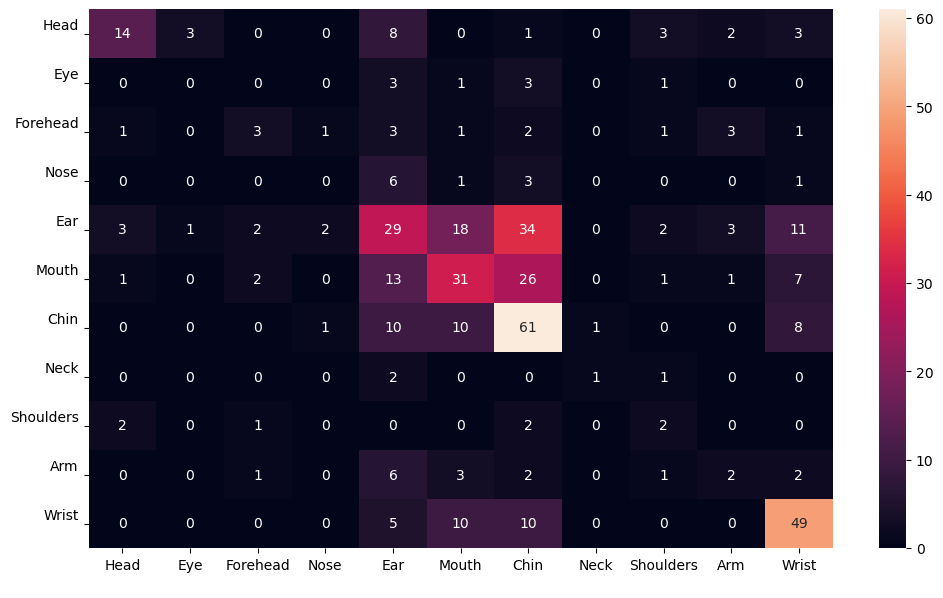

In [96]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sn

# Set the model to evaluation mode
model.eval()

y_pred = []
y_true = []

for inputs, labels in test_loader:
        output = model(inputs) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth
model.train()


inverted_label_keys = dict(map(reversed, label_keys.items()))
label = [inverted_label_keys[i] for i in range(11)]

color = 'white'
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in label],
                     columns = [i for i in label])
df_cm_2 = pd.DataFrame(cf_matrix, index = [i for i in label],
                     columns = [i for i in label])

plt.figure(figsize = (12,7))
# sn.heatmap(df_cm, annot=True)
sn.heatmap(df_cm_2, annot=True)
# ax.set_title('Confusion Matrix', color='Black')
# plt.xlabel('Predicted Label', color='Black')
# plt.ylabel('True Label', color='Black')
# ax.xaxis.set_ticklabels(label)
# ax.yaxis.set_ticklabels(label)
# plt.gcf().axes[0].tick_params(colors='Black')
# plt.gcf().axes[1].tick_params(colors='Black')
# plt.savefig("C:/Users/KAI/OneDrive/Documents/2023 Sem 2/REIT4841/Data/ConfusionMatrixRFC.png")
# plt.savefig('output.png')
plt.show()